In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from salishsea_tools import evaltools as et
import datetime as dt
import f90nml
import os
import glob
%matplotlib inline

In [25]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    z=fm.variables['gdept_1d'][:]
    e1e2t=fm.variables['e1t'][:,:,:]*fm.variables['e2t'][:,:,:]
    e2t=fm.variables['e2t'][:,:,:]
    umask=fm.variables['umask'][:,:,:,:]

dict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


In [3]:
rpath='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/'
tdir='testT3TRP'

In [4]:
f0=nc.Dataset(glob.glob(os.path.join(rpath,tdir,'SalishSea_1h_*_ptrc_T_*.nc'))[0])
fe=nc.Dataset(glob.glob(os.path.join(rpath,tdir,'SalishSea_1h_*_pe3t_T_*.nc'))[0])
fu=nc.Dataset(glob.glob(os.path.join(rpath,tdir,'SalishSea_1h_*_grid_U_*.nc'))[0])

In [5]:
f0.variables.keys(), fe.variables.keys(), fu.variables.keys()

(dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'depthw', 'depthw_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TUR1', 'TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'TUR8', 'TUR9', 'TUR10', 'SFTURB', 'e3t', 'woce']),
 dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TUR1_E3T', 'TUR2_E3T', 'TUR3_E3T', 'TUR4_E3T', 'TUR5_E3T', 'TUR6_E3T', 'TUR7_E3T', 'TUR8_E3T', 'TUR9_E3T', 'TUR10_E3T']),
 dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TUR1_UT', 'TUR2_UT', 'TUR3_UT', 'TUR4_UT', 'TUR5_U

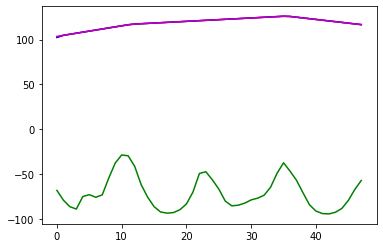

In [107]:
plt.plot(f0.variables['TUR1'][:,3,415,345],'r-')
plt.plot(f0.variables['TUR2'][:,3,415,345],'b-')
plt.plot(f0.variables['woce'][:,3,415,345]*1e6,'g-')
plt.plot(f0.variables['SFTURB'][:,415,345],'m-')

In [106]:
np.max(np.abs(f0.variables['woce'][:,3,415,345]))

94.69778

In [7]:
nml=f90nml.read(os.path.join(rpath,tdir,'namelist_trace3_cfg'))
wd=nml['nampisriv']['wd']
alpha_C=nml['nampisriv']['alpha_C']
alpha_T=nml['nampisriv']['alpha_T']

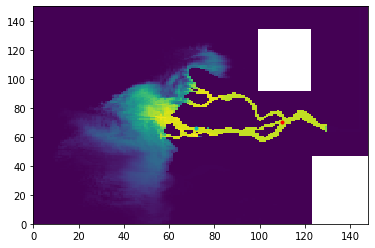

In [8]:
xl=(250,399)
yl=(350,500)
plt.pcolormesh(f0.variables['TUR1'][-1,0,yl[0]:yl[1],xl[0]:xl[1]])
plt.plot(360-xl[0],420-yl[0],'r.')
plt.plot(322-xl[0],416-yl[0],'c.')

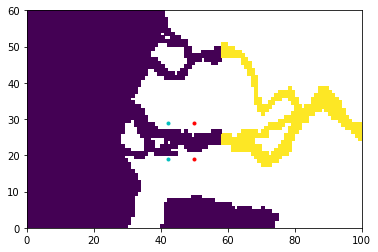

In [9]:
xl=(280,380)
yl=(390,450)
plt.pcolormesh(np.ma.masked_where(tmask[0,0,yl[0]:yl[1],xl[0]:xl[1]]==0,f0.variables['SFTURB'][-1,yl[0]:yl[1],xl[0]:xl[1]]))
plt.plot(330-xl[0],419-yl[0],'r.')
plt.plot(322-xl[0],419-yl[0],'c.')
plt.plot(330-xl[0],409-yl[0],'r.')
plt.plot(322-xl[0],409-yl[0],'c.')

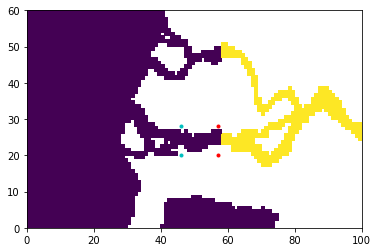

In [86]:
xw=(280,380)
yw=(390,450)
xl=(326,337)
yl=(410,418)
plt.pcolormesh(np.ma.masked_where(tmask[0,0,yw[0]:yw[1],xw[0]:xw[1]]==0,f0.variables['SFTURB'][-1,yw[0]:yw[1],xw[0]:xw[1]]))
plt.plot(xl[1]-xw[0],yl[1]-yw[0],'r.')
plt.plot(xl[0]-xw[0],yl[1]-yw[0],'c.')
plt.plot(xl[1]-xw[0],yl[0]-yw[0],'r.')
plt.plot(xl[0]-xw[0],yl[0]-yw[0],'c.')

In [87]:
vlist=[el for el in f0.variables.keys() if el.startswith('TUR')]
flen=np.shape(f0.variables[vlist[0]])[0]
maskTile=np.tile(tmask[:,:,yl[0]:yl[1],xl[0]:xl[1]],(flen,1,1,1))

In [108]:
sumT=dict()
ddt_sumT=dict()
sumW=dict()
sumE=dict()
bfluxest=dict()
resid=dict()
varturlist=('TUR1','TUR2','TUR3','TUR4','TUR5',
                         'TUR6','TUR7','TUR8','TUR9','TUR10')
vare3tlist=('TUR1_E3T','TUR2_E3T','TUR3_E3T','TUR4_E3T','TUR5_E3T',
                         'TUR6_E3T','TUR7_E3T','TUR8_E3T','TUR9_E3T','TUR10_E3T')
varulist=('TUR1_UT','TUR2_UT','TUR3_UT','TUR4_UT','TUR5_UT',
                         'TUR6_UT','TUR7_UT','TUR8_UT','TUR9_UT','TUR10_UT')
for i, vart,vare,varU in zip(np.arange(0,10),varturlist,vare3tlist,varulist):
    turvol=fe.variables[vare][:,:,yl[0]:yl[1],xl[0]:xl[1]]*e1e2t[:,yl[0]:yl[1],xl[0]:xl[1]]
    sumT[i]=np.sum(np.sum(np.sum(maskTile*turvol,3),2),1)
    ddt_sumT[i]=sumT[i][1:]-sumT[i][:-1] # per hour
    usliceW=fu.variables[varU][:,:,yl[0]:yl[1],xl[0]-1]*umask[:,:,yl[0]:yl[1],xl[0]-1]
    usliceE=fu.variables[varU][:,:,yl[0]:yl[1],xl[1]-1]*umask[:,:,yl[0]:yl[1],xl[1]-1]
    sumW[i]=np.sum(np.sum(usliceW,2),1)*3600 # per hour
    sumE[i]=np.sum(np.sum(usliceE,2),1)*3600 # per hour
    Cbot=np.sum(f0.variables[vart][:,:-1,yl[0]:yl[1],xl[0]:xl[1]]*(maskTile[:,:-1,:,:]-maskTile[:,1:,:,:]),1)
    #e3tbot=np.sum(f0.variables['e3t'][:,:-1,yl[0]:yl[1],xl[0]:xl[1]]*(maskTile[:,:-1,:,:]-maskTile[:,1:,:,:]),1)
    bfluxest[i]=np.sum(np.sum(-1*wd[i]/24*Cbot*(1-alpha_T[i])*e1e2t[:,yl[0]:yl[1],xl[0]:xl[1]],2),1) # per hour
    resid[i]=sumE[i]-sumW[i]+bfluxest[i]


Text(0, 0.5, 'Hour')

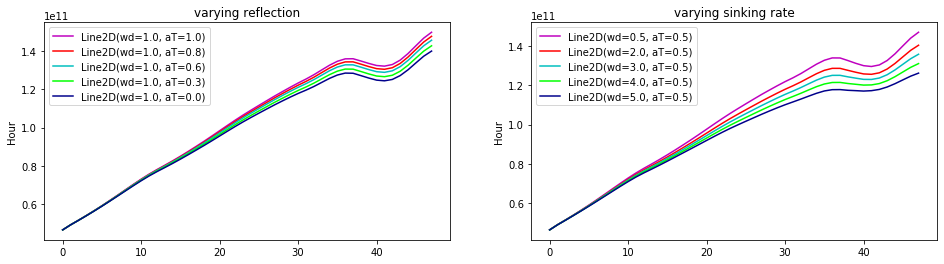

In [33]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
ax=ax.flatten()
cols=('m','r','c','lime','darkblue')
p=list()

for i in range(0,5):
    varind=i
    p1,=ax[0].plot(sumT[i],'-',color=cols[i],label='wd={}, aT={}'.format(wd[varind],alpha_T[varind]))
    p.append(p1)
ax[0].legend(p)
ax[0].set_title('varying reflection')
ax[0].set_ylabel('Tracer Content')
ax[0].set_ylabel('Hour')

p=list()
for i in range(5,10):
    varind=i
    p1,=ax[1].plot(sumT[i],'-',color=cols[i-5],label='wd={}, aT={}'.format(wd[varind],alpha_T[varind]))
    p.append(p1)
ax[1].legend(p)
ax[1].set_title('varying sinking rate')
ax[1].set_ylabel('Tracer Content')
ax[1].set_ylabel('Hour')

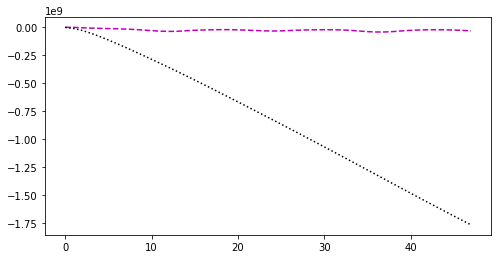

In [89]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.plot(sumT[1]-sumT[0],'m--')
ax.plot(np.cumsum(bfluxest[1]),'k:')

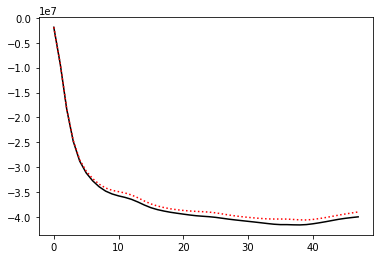

In [95]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(bfluxest[1],'k-')
ax.plot(bfluxest[4]*.2,'r:')

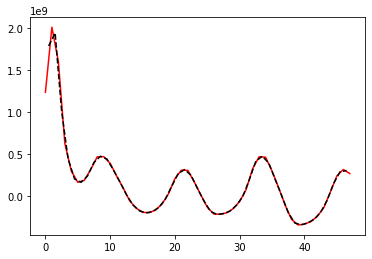

In [111]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(sumW[1]-sumE[1]+bfluxest[1],'r-')
ax.plot(np.arange(0.5,flen-1),ddt_sumT[1],'k--')

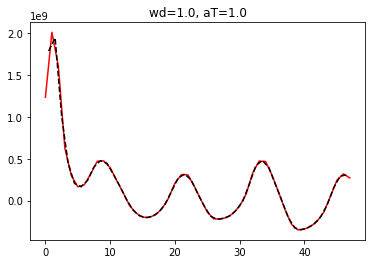

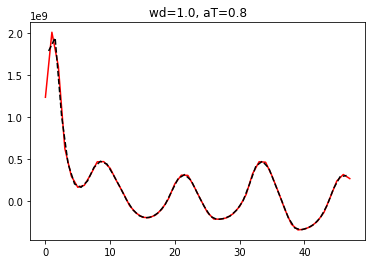

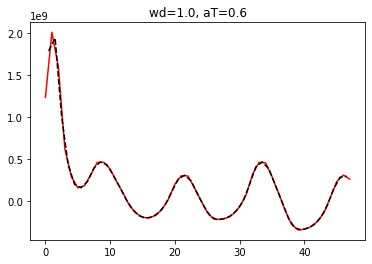

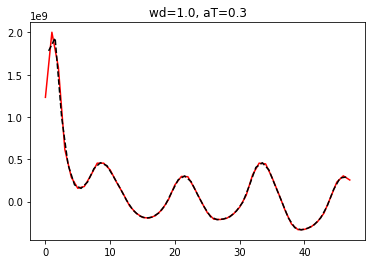

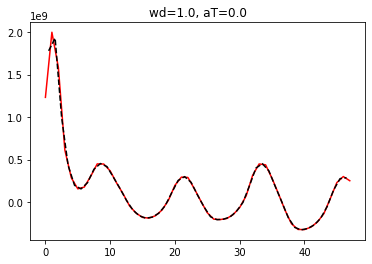

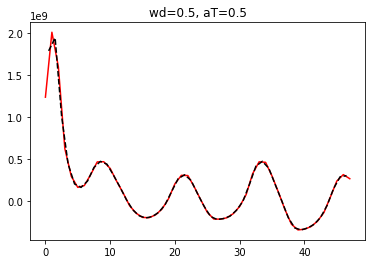

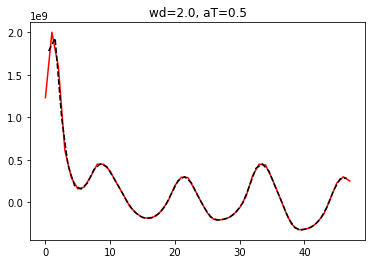

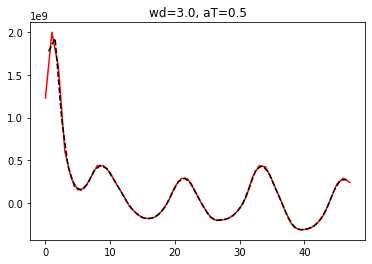

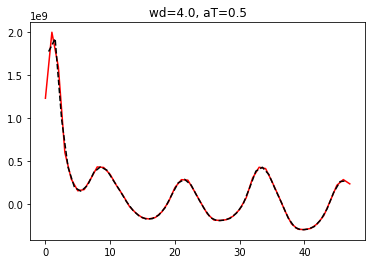

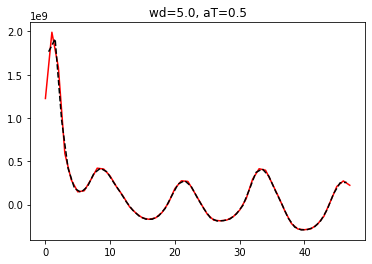

In [110]:
for ii in range(0,10):
    fig,ax=plt.subplots(1,1,figsize=(6,4))
    ax.plot(sumW[ii]-sumE[ii]+bfluxest[ii],'r-')
    ax.plot(np.arange(0.5,flen-1),ddt_sumT[ii],'k--')
    ax.set_title('wd={}, aT={}'.format(wd[ii],alpha_T[ii]))

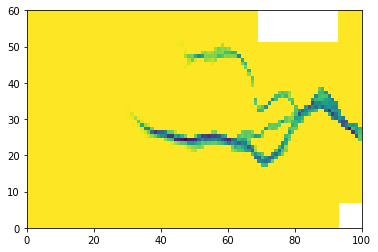

In [47]:
plt.pcolormesh(fu.variables['TUR1_UT'][5,2,yl[0]:yl[1],xl[0]:xl[1]])

In [ ]:
rpath='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/results/'
dirlist=('testT3FixG',)#'testT3','testT3_2','testT3_3','testT3_4','testT3_5','testT3_6','testT3_7','testT3_8',
#         'testT3_9','testT3_9a','testT3_qsrFalse')
for tdir in dirlist:
    fpath=glob.glob(os.path.join(rpath,tdir,'SalishSea_1h_*_ptrc_T_*.nc'))[0]
    nml=f90nml.read(os.path.join(rpath,tdir,'namelist_trace3_cfg'))
    print(tdir)

    wd=nml['nampisriv']['wd']
    alpha_C=nml['nampisriv']['alpha_C']
    alpha_T=nml['nampisriv']['alpha_T']

    with nc.Dataset(fpath) as f0:
        vlist=[el for el in f0.variables.keys() if el.startswith('TUR')]
        rows=int(np.ceil(len(vlist)/4))
        fig,ax=plt.subplots(rows,4,figsize=(16,4*rows))
        fig.subplots_adjust(hspace=.5)
        ax=ax.flatten()
        for ii,var in zip(np.arange(0,len(vlist)),vlist):
            print(var)
            iax=ax[ii]
            varind=int(var[3:])-1
            iax.set_title('{}: {}\n aT={}, wd={}, aC={}'.format(tdir,var,alpha_T[varind],wd[varind],alpha_C[varind]))
            iax.plot(f0.variables[var][:3*24,3,415,345],'r-')
            iax.plot(f0.variables[var][:3*24,0,415,345],'b-')
            if 'SFTURB' in f0.variables.keys():
                iax.plot(f0.variables['SFTURB'][:3*24,415,345],'k-')

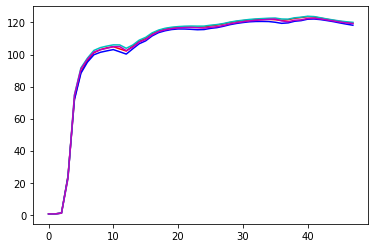

In [30]:
plt.plot(f0.variables['TUR1'][:,3,416,322],'r-')
plt.plot(f0.variables['TUR2'][:,3,416,322],'b-')
plt.plot(f0.variables['TUR1'][:,12,416,322],'c-')
plt.plot(f0.variables['TUR2'][:,12,416,322],'m-')
#plt.plot(f0.variables['SFTURB'][:,416,322],'m-')

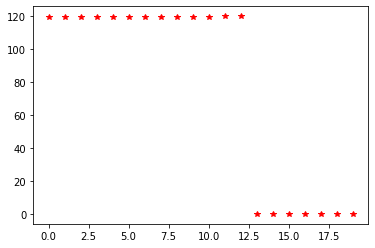

In [29]:
plt.plot(f0.variables['TUR1'][-1,:20,416,322],'r*')

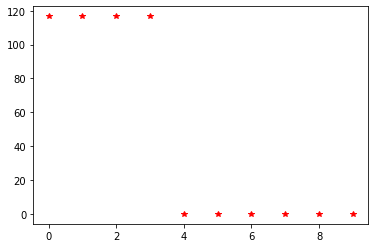

In [7]:
plt.plot(f0.variables['TUR1'][-1,:10,415,345],'r*')

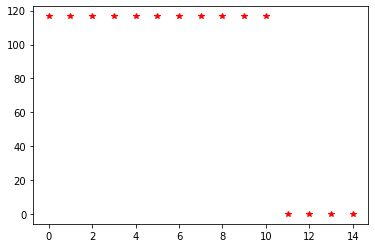

In [13]:
plt.plot(f0.variables['TUR1'][-1, 0:15, 420, 360],'r*')

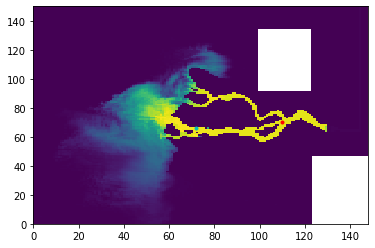

In [25]:
plt.pcolormesh(f0.variables['TUR1'][-1,0,350:500,250:])
plt.plot(360-250,420-350,'r.')
plt.plot(322-250,416-350,'c.')

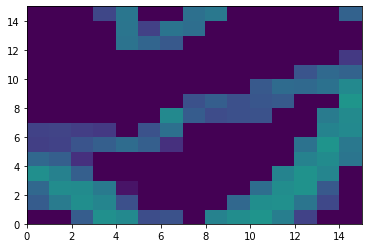

In [33]:
plt.pcolormesh(f0.variables['TUR1'][-1,0,410:425,345:360],vmin=116.6,vmax=116.7)


In [32]:
np.unique(f0.variables['TUR1'][-1,0,410:425,345:360])

masked_array(data=[  0.      , 116.58214 , 116.60513 , 116.61378 ,
                   116.614044, 116.616455, 116.61672 , 116.61803 ,
                   116.61866 , 116.61917 , 116.61955 , 116.61956 ,
                   116.61968 , 116.62006 , 116.6213  , 116.62155 ,
                   116.62304 , 116.62317 , 116.62433 , 116.624405,
                   116.62451 , 116.62482 , 116.62502 , 116.62516 ,
                   116.62521 , 116.62579 , 116.62597 , 116.62688 ,
                   116.6274  , 116.62754 , 116.62759 , 116.62785 ,
                   116.6287  , 116.62882 , 116.62904 , 116.62962 ,
                   116.62971 , 116.62974 , 116.62994 , 116.63    ,
                   116.63114 , 116.63148 , 116.63241 , 116.63329 ,
                   116.63336 , 116.63353 , 116.63376 , 116.63378 ,
                   116.6347  , 116.63502 , 116.635826, 116.63588 ,
                   116.636345, 116.63642 , 116.63722 , 116.63754 ,
                   116.63805 , 116.63866 , 116.638695, 116.638

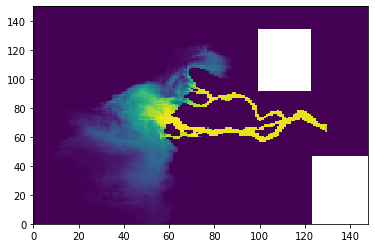

In [11]:
plt.pcolormesh(f0.variables['TUR1'][-1,0,350:500,250:])

In [ ]:
0, 0:15, 420, 360

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,360:470,250:]==0,f0.variables['TUR1'][-1,0,360:470,250:]))
fig.colorbar(m)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
m=ax.pcolormesh(np.ma.masked_where(tmask[0,360:470,250:]==0,f0.variables['TUR9'][-1,0,360:470,250:]))
fig.colorbar(m)

In [ ]:
plt.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:])),f0.variables['BIOSINK1'][1,:,414,200:],'k.');

In [ ]:
plt.plot(np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[0,414,200:],f0.variables['E1E2TASP'][1,:,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(e1e2t[0,414,200:],f0.variables['E1E2TA'][1,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(f0.variables['woce'][1,:,414,200:]*e1e2t[:,414,200:],f0.variables['ZWN1'][1,:,414,200:],'k.');
ax.plot(f0.variables['woce'][1,0,414,200:]*e1e2t[0,414,200:],f0.variables['ZWN1'][1,0,414,200:],'r.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[:,414,200:]*tmask[:,414,200:],
        f0.variables['ZWNBIO1'][1,:,414,200:]*tmask[:,414,200:],'k.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,0,414,200:]))*e1e2t[0,414,200:]*tmask[0,414,200:],
        f0.variables['ZWNBIO1'][1,0,414,200:]*tmask[0,414,200:],'r.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,20,414,200:]))*e1e2t[0,414,200:]*tmask[20,414,200:],
        f0.variables['ZWNBIO1'][1,20,414,200:]*tmask[20,414,200:],'c.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[:,414,200:]*tmask[:,414,200:],
        f0.variables['ZWNBIO2'][1,:,414,200:]*tmask[:,414,200:],'k.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,0,414,200:]))*e1e2t[0,414,200:]*tmask[0,414,200:],
        f0.variables['ZWNBIO2'][1,0,414,200:]*tmask[0,414,200:],'r.');
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,20,414,200:]))*e1e2t[0,414,200:]*tmask[20,414,200:],
        f0.variables['ZWNBIO2'][1,20,414,200:]*tmask[20,414,200:],'c.');

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(-1/(24*3600)*np.ones(np.shape(f0.variables['woce'][1,:,414,200:]))*e1e2t[:,414,200:],
        f0.variables['BIOSINK1'][1,:,414,200:]*f0.variables['E1E2TASP'][1,:,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(9,6))
m=ax[0].pcolormesh(f0.variables['ZWN1'][1,:,414,200:])
ax[0].set_ylim(40,0)
plt.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(f0.variables['woce'][1,:,414,200:])
ax[1].set_ylim(40,0)
plt.colorbar(m,ax=ax[1])
#plt.plot(f0.variables['ZVN1'][1,:,414,200:],f0.variables['woce'][1,:,414,200:],'k.');

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(9,6))
m=ax[0].pcolormesh(f0.variables['ZWNBIO1'][1,:,414,200:])
ax[0].set_ylim(40,0)
plt.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(f0.variables['ZWNBIO1'][1,:,414,200:]-f0.variables['ZWN1'][1,:,414,200:])
ax[1].set_ylim(40,0)
plt.colorbar(m,ax=ax[1])
#plt.plot(f0.variables['ZVN1'][1,:,414,200:],f0.variables['woce'][1,:,414,200:],'k.');

for var in ('TUR1','TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'TUR8', 'TUR9',):
    print(np.max(np.abs(f0.variables[var][-1,0,:,:]-f0.variables['TUR10'][-1,0,:,:])))

In [ ]:
plt.pcolormesh(f0.variables['TUR10'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR2'][-1,0,:,:],vmin=0,vmax=15)
plt.colorbar()

In [ ]:
np.shape(f0.variables['TUR1'][-1,:,414,200:])

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR1'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR7'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
plt.pcolormesh(np.arange(0,198).T,-1*z.T,np.ma.masked_where(tmask[:,414,200:]==0,f0.variables['TUR10'][-1,:,414,200:]),vmin=0,vmax=5)
plt.colorbar()
plt.ylim(-50,0)

In [ ]:
np.max(f1.variables['TUR1'][0,0,:,:])

In [ ]:
plt.pcolormesh(f0.variables['TUR1'][8,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR5'][-1,0,:,:])
plt.colorbar()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
m=ax.pcolormesh(f1.variables['TUR2'][0,0,370:450,300:])
fig.colorbar(m)
ax.plot(40,44,'r*')

In [ ]:
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m03d31.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d01.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d02.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d10.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d15.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d18.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d19.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d20.nc') as ft:
    print(np.max(ft.variables['turb']))
with nc.Dataset('/results/forcing/rivers/turbidity_201906/riverTurbDaily201906_y2015m04d30.nc') as ft:
    print(np.max(ft.variables['turb']))

In [ ]:
plt.pcolormesh(f1.variables['vosaline'][0,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['vosaline'][-1,0,:,:])
plt.colorbar()

In [ ]:
plt.pcolormesh(f0.variables['TUR1'][0,:,430,200:],vmin=0,vmax=5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f2.variables['TUR1'][9,:,430,200:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][29,:,430,200:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
plt.pcolormesh(f1.variables['TUR1'][9,:,430,345:],vmin=0,vmax=.5)
plt.colorbar()

In [ ]:
ftype='riverTurbDaily2'
basedir='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/riverTurbGraham/'
nam_fmt='forcing'
flen=1
tres=24
f0turbind=et.index_model_files(dt.datetime(2015,4,1),dt.datetime(2015,4,10),basedir,nam_fmt,flen,ftype,tres)

In [ ]:
xx=0
for ifile in f0turbind['paths']:
    with nc.Dataset(ifile) as ff:
        plt.plot(xx,ff.variables['turb'][0,415,345],'kx')
    xx=xx+24
plt.plot(f0.variables['TUR1'][:,0,415,345],'r-')
plt.plot(f1.variables['TUR1'][:,0,415,345],'b-')

In [ ]:
xx=0
for ifile in f0turbind['paths']:
    with nc.Dataset(ifile) as ff:
        plt.plot(xx,ff.variables['turb'][0,415,345],'kx')
    xx=xx+24
plt.plot(f0.variables['TUR1'][:,10,415,345],'r-')
plt.plot(f1.variables['TUR1'][:,10,415,345],'b-')